# **NAME - Rohan Deshraj Kujur**

---
## **Task 6: Prediction using Decision Tree Algorithm**


1.   Create the Decision Tree classifier and visualize it graphically.
2.   The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


---

## **Importing required libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import sklearn.tree as tree
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline

## **Loading the Dataset**

In [3]:
# Forming the iris dataframe
Data = pd.read_csv("Dataset/Iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


## **Exploratory Data Analysis**

### **Reading Dataset**

In [4]:
#Top values of dataset
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Bottom values of dataset
Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### **Shape of Data**

In [6]:
Data.shape

(150, 6)

In [7]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **Data Information**

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **Statistical Properties of Dataset**

In [9]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
Data.drop('Id', axis = 1 , inplace= True)

In [11]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **Data Visualization**

### **Box Plot of each feature**

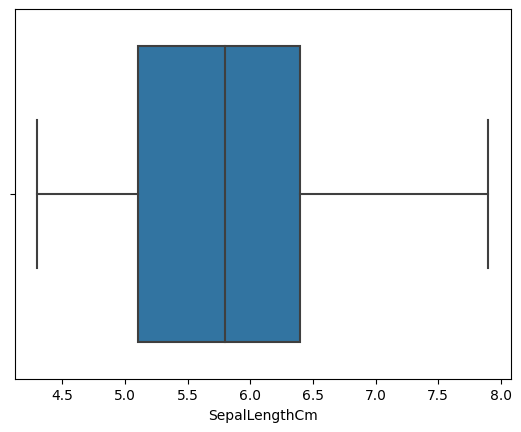

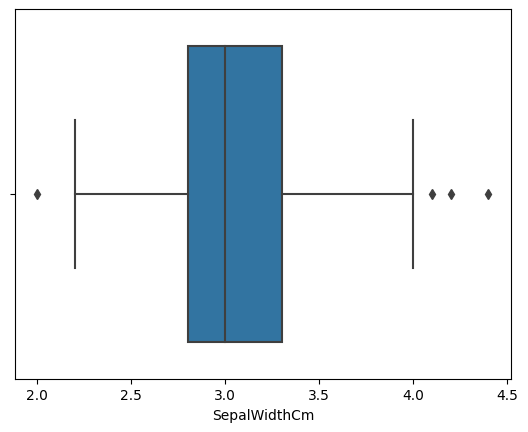

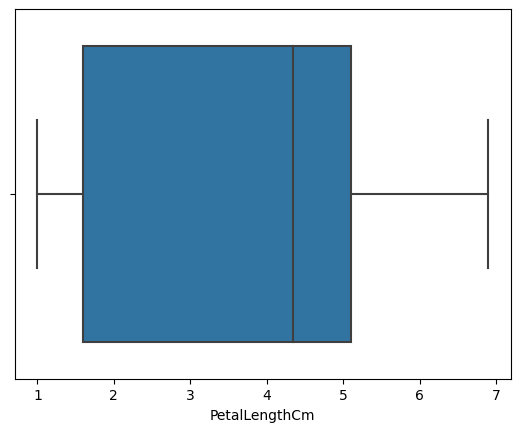

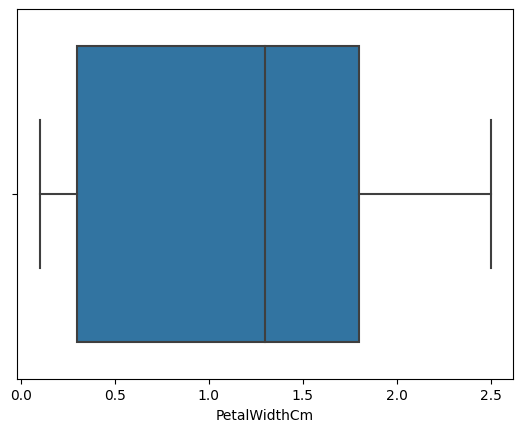

In [15]:
for cl in Data.columns:
    if Data[cl].dtype != 'object': 
        sns.boxplot(x=Data[cl])
        plt.show()

### **Histogram of each feature**

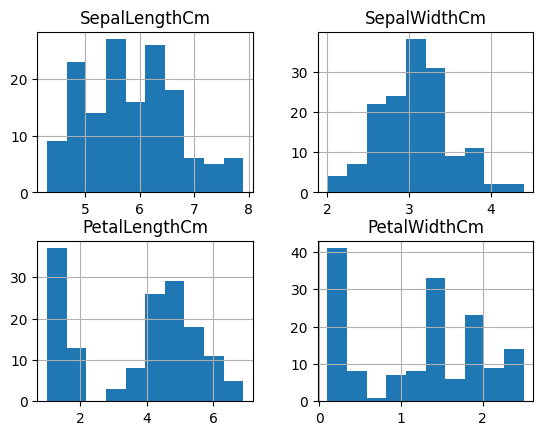

In [16]:
Data.hist()
plt.show()

### **Box plot between features Vs Species**

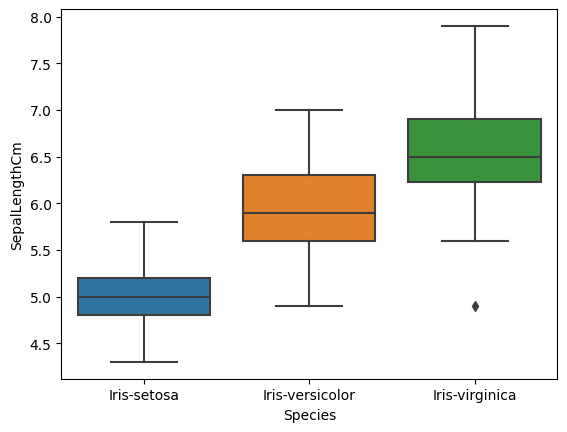

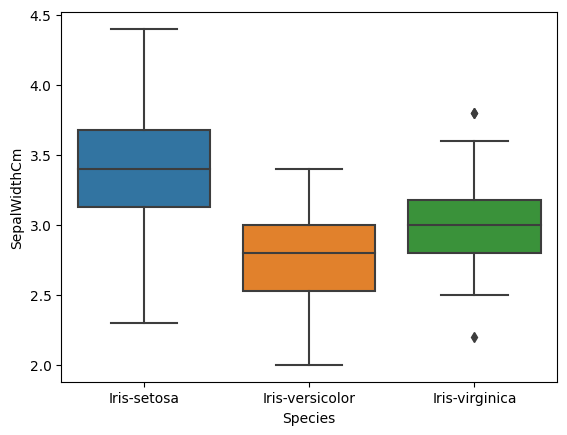

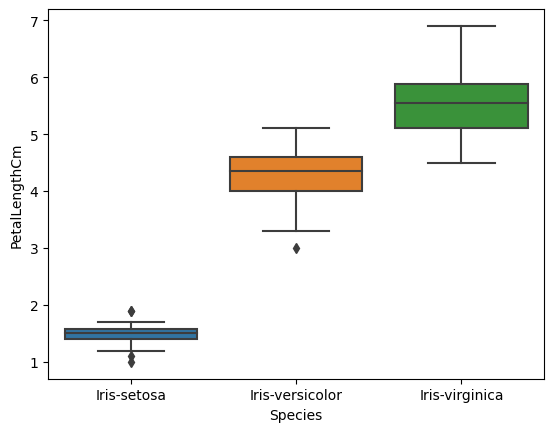

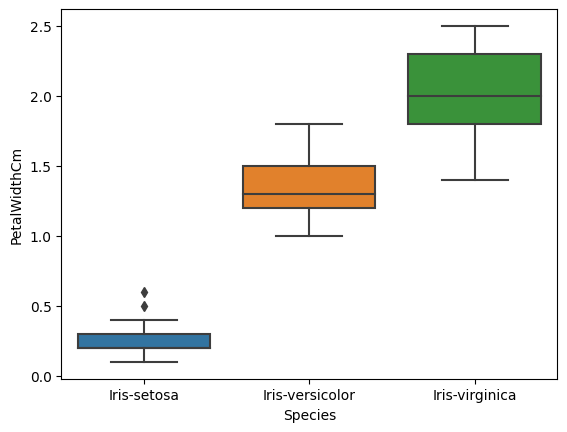

In [17]:
for col in Data.columns:
    if Data[col].dtypes != "object":
        sns.boxplot(x=Data['Species'],y=Data[col])     #Hence the features with Species has linear realtionship
        plt.show()

### **Correlation function**

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<AxesSubplot:>

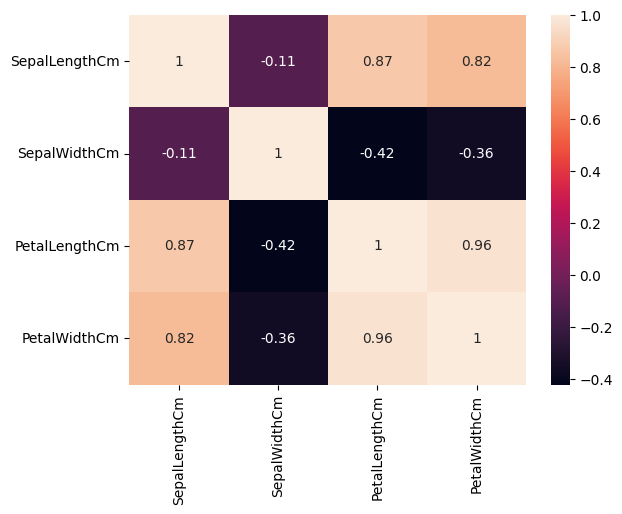

In [18]:
print(Data.corr())
sns.heatmap(Data.corr(), annot = True)

### **Pairplot**

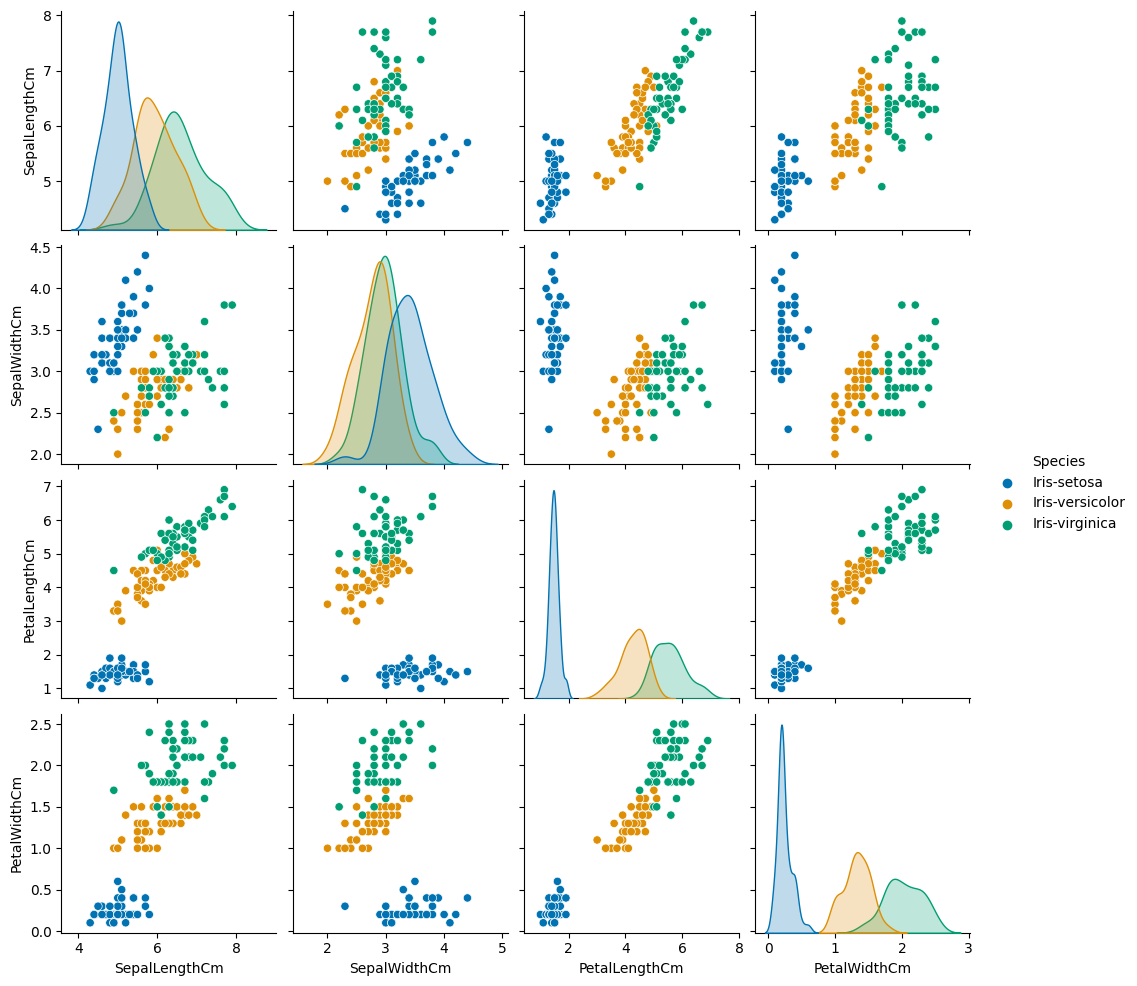

In [19]:
sns.pairplot(data=Data,hue="Species",palette="colorblind")

## **Data Prepration**

In [20]:
X = Data.drop('Species', axis = 1)
Y = Data['Species']

### **Train-Test Split**

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

## **Training the Model**

In [22]:

dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)


In [23]:
#Saving Model
pickle.dump(dtc, open('Iris_Model.pkl','wb'))

## **Visualize the Decision Tree Classifier algorithm graph**

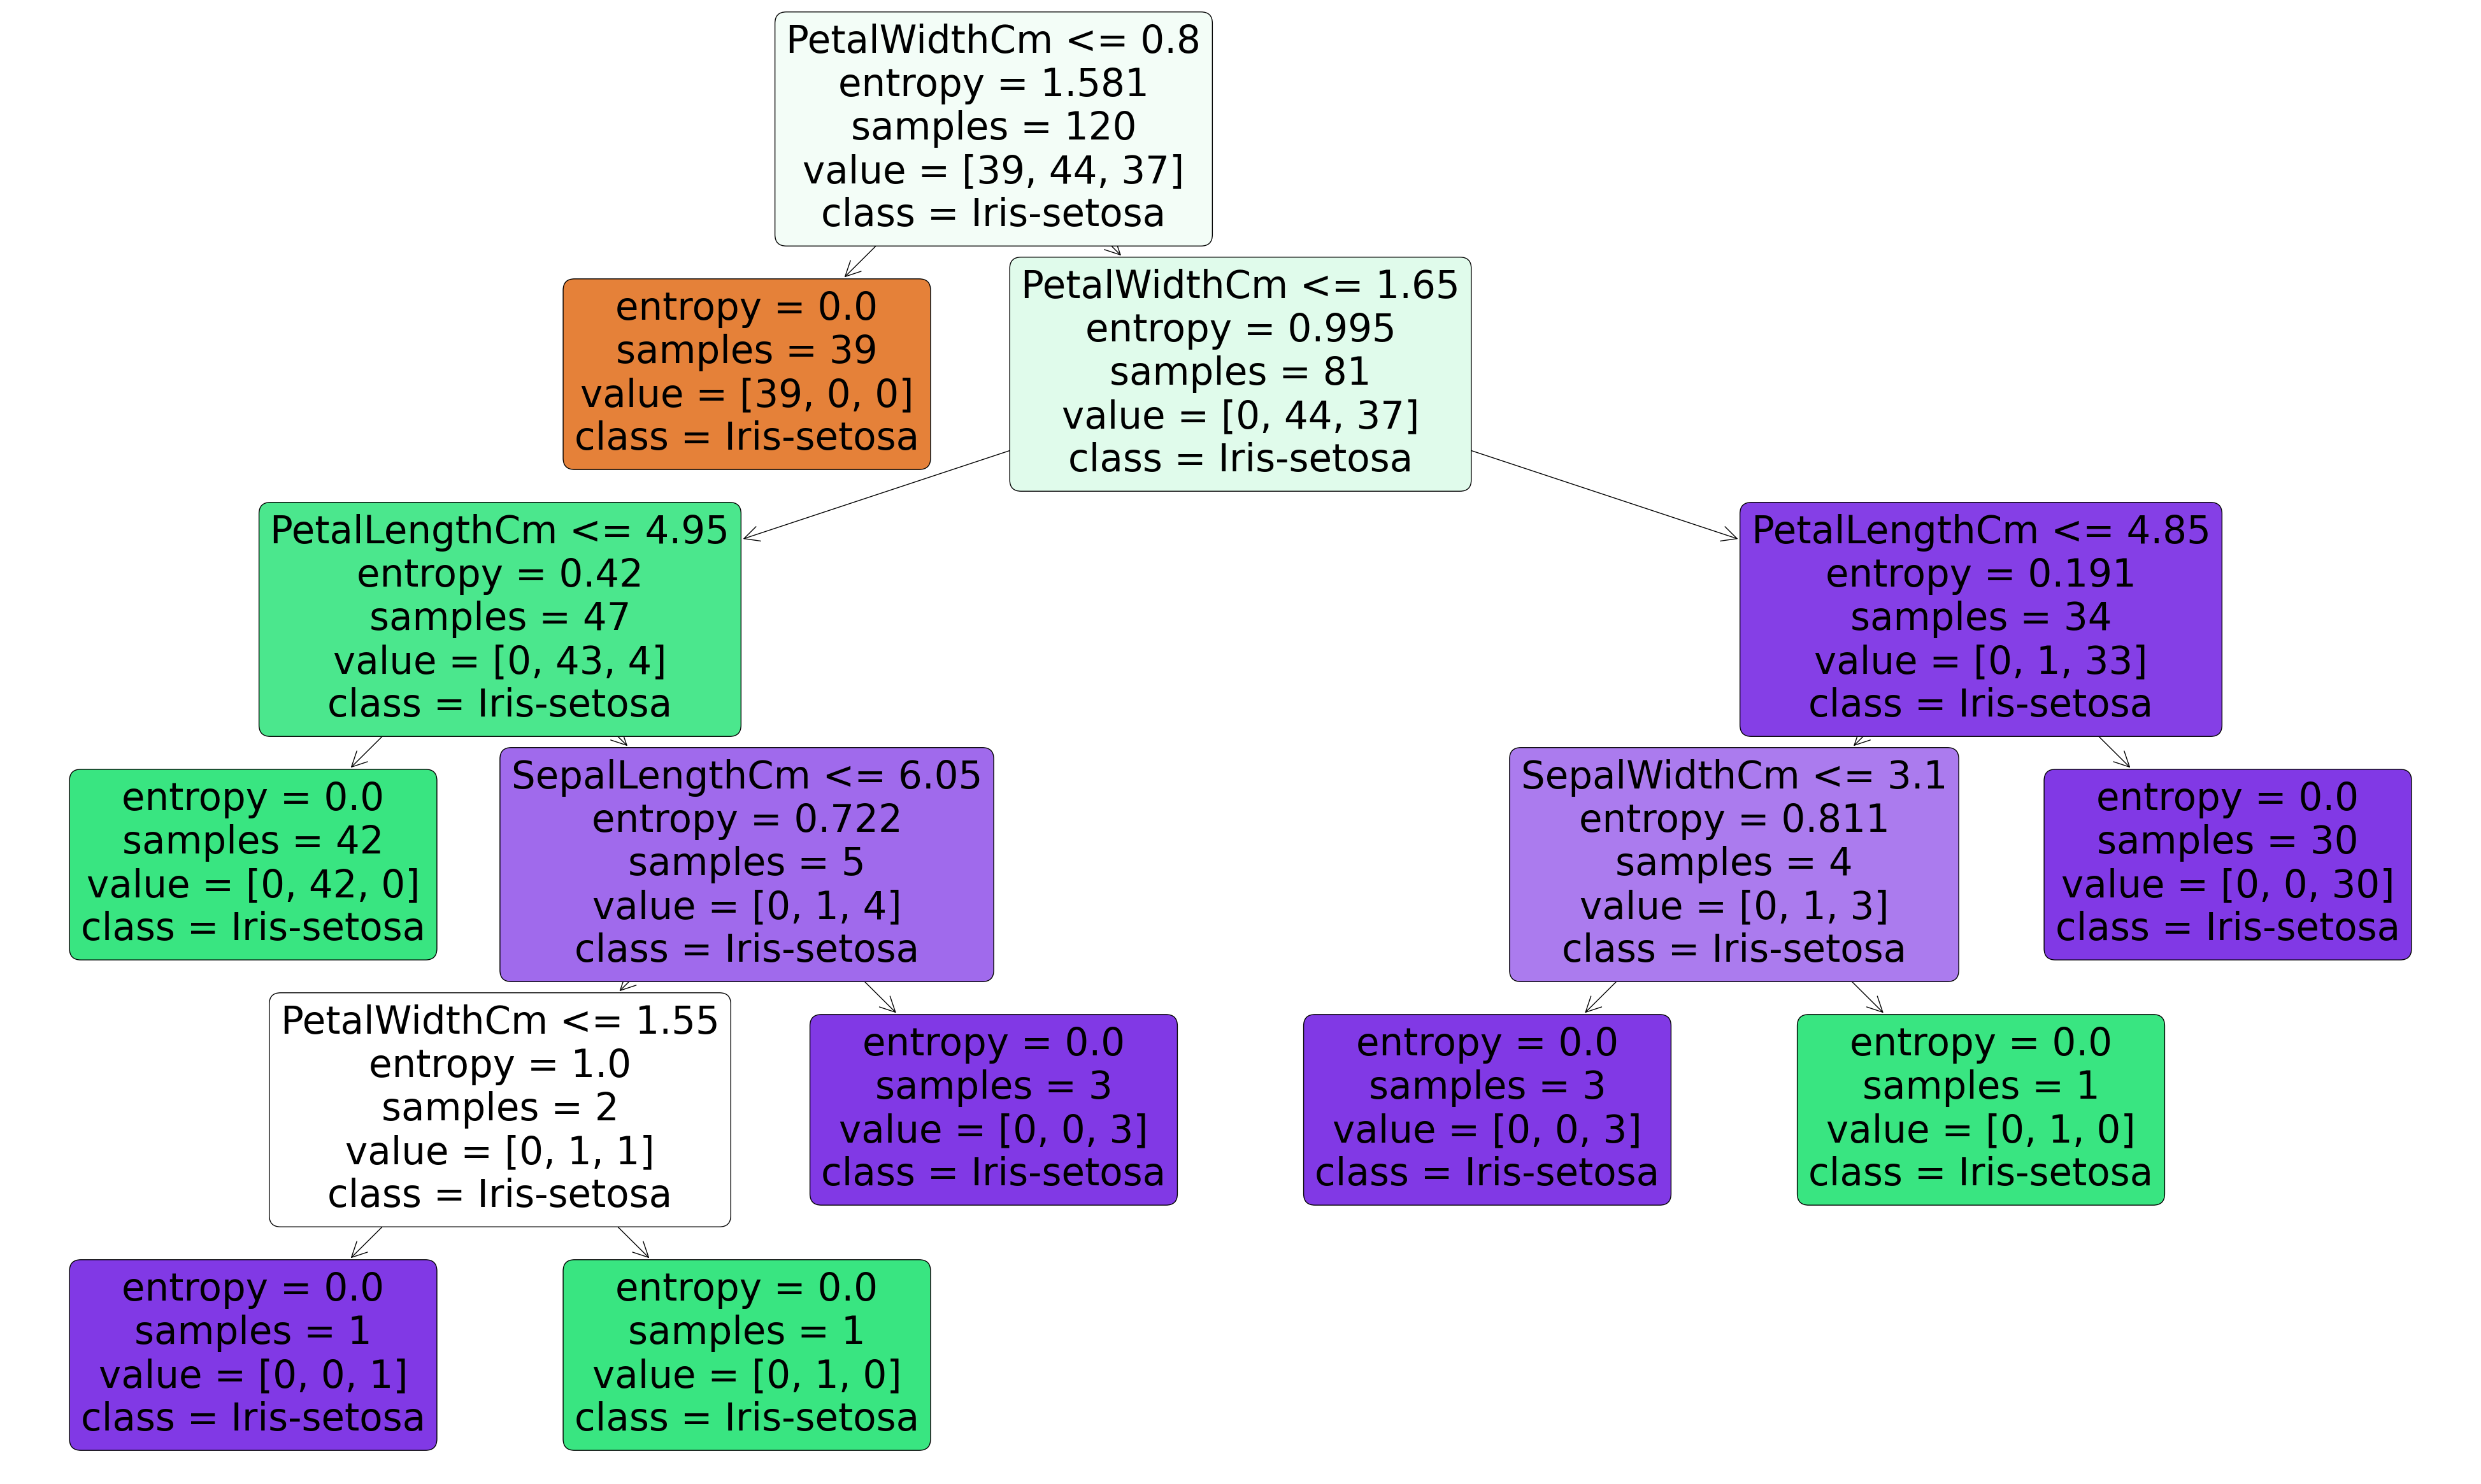

In [24]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(dtc,feature_names=Data.columns.drop('Species'),class_names=Data.Species,filled=True,rounded=True)

## **Model Evaluation**

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

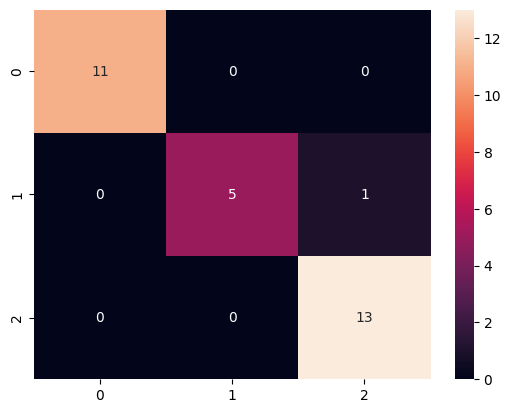

In [25]:

print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [26]:
accuracy_score(y_test, y_predict)

0.9666666666666667

We got nearly 97% accuracy. So, we can deploy this model. 

# **Thank You!**